# EDA

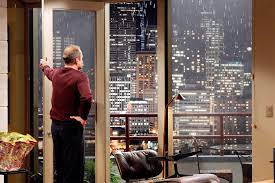

In [160]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Importing Data

In [161]:

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1)

### Checking Data

In [162]:
# Create DataFrame 
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [163]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count 21597.000      21597.000   21597.000 21597.000  21597.000      
mean  4580474287.771 540296.574  3.373     2.116      2080.322       
std   2876735715.748 367368.140  0.926     0.769      918.106        
min   1000102.000    78000.000   1.000     0.500      370.000        
25%   2123049175.000 322000.000  3.000     1.750      1430.000       
50%   3904930410.000 450000.000  3.000     2.250      1910.000       
75%   7308900490.000 645000.000  4.000     2.500      2550.000       
max   9900000190.000 7700000.000 33.000    8.000      13540.000      

         sqft_lot    floors  waterfront      view  condition     grade  \
count 21597.000   21597.000 19221.000   21534.000 21597.000  21597.000   
mean  15099.409   1.494     0.008       0.234     3.410      7.658       
std   41412.637   0.540     0.087       0.766     0.651      1.173       
min   520.000     1.000     0.000       0.000     1.000      3.000       
25%   5040.000    1.000     0.000       0.000     3.000      7.000       
50%   7618.000    1.500     0.000       0.000     3.000      7.000       
75%   10685.000   2.000     0.000       0.000     4.000      8.000       
max   1651359.000 3.500     1.000       4.000     5.000      13.000      

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count 21597.000   21597.000 17755.000     21597.000 21597.000 21597.000   
mean  1788.597    1971.000  83.637        98077.952 47.560    -122.214    
std   827.760     29.375    399.946       53.513    0.139     0.141       
min   370.000     1900.000  0.000         98001.000 47.156    -122.519    
25%   1190.000    1951.000  0.000         98033.000 47.471    -122.328    
50%   1560.000    1975.000  0.000         98065.000 47.572    -122.231    
75%   2210.000    1997.000  0.000         98118.000 47.678    -122.125    
max   9410.000    2015.000  2015.000      98199.000 47.778    -121.315    

       sqft_living15  sqft_lot15  
count 21597.000      21597.000    
mean  1986.620       12758.284    
std   685.230        27274.442    
min   399.000        651.000      
25%   1490.000       5100.000     
50%   1840.000       7620.000     
75%   2360.000       10083.000    
max   6210.000       871200.000

In [164]:
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000  3        1.000       1180          
1  6414100192  12/9/2014  538000.000  3        2.250       2570          
2  5631500400  2/25/2015  180000.000  2        1.000       770           
3  2487200875  12/9/2014  604000.000  4        3.000       1960          
4  1954400510  2/18/2015  510000.000  3        2.000       1680          

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0  5650     1.000   NaN         0.000  3          7      1180         
1  7242     2.000   0.000       0.000  3          7      2170         
2  10000    1.000   0.000       0.000  3          6      770          
3  5000     1.000   0.000       0.000  5          7      1050         
4  8080     1.000   0.000       0.000  3          8      1680         

  sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0  0.0           1955     0.000          98178   47.511 -122.257   
1  400.0         1951     1991.000       98125   47.721 -122.319   
2  0.0           1933     NaN            98028   47.738 -122.233   
3  910.0         1965     0.000          98136   47.521 -122.393   
4  0.0           1987     0.000          98074   47.617 -122.045   

   sqft_living15  sqft_lot15  
0  1340           5650        
1  1690           7639        
2  2720           8062        
3  1360           5000        
4  1800           7503

In [165]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [167]:
df.isnull()

id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False  False     False      False        False      
1      False  False  False  False     False      False        False      
2      False  False  False  False     False      False        False      
3      False  False  False  False     False      False        False      
4      False  False  False  False     False      False        False      
...      ...    ...    ...    ...       ...        ...          ...      
21592  False  False  False  False     False      False        False      
21593  False  False  False  False     False      False        False      
21594  False  False  False  False     False      False        False      
21595  False  False  False  False     False      False        False      
21596  False  False  False  False     False      False        False      

       floors  waterfront   view  condition  grade  sqft_above  sqft_basement  \
0      False   True        False  False      False  False       False           
1      False   False       False  False      False  False       False           
2      False   False       False  False      False  False       False           
3      False   False       False  False      False  False       False           
4      False   False       False  False      False  False       False           
...      ...     ...         ...    ...        ...    ...         ...           
21592  False   False       False  False      False  False       False           
21593  False   False       False  False      False  False       False           
21594  False   False       False  False      False  False       False           
21595  False   True        False  False      False  False       False           
21596  False   False       False  False      False  False       False           

       yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
0      False     False         False    False  False  False           
1      False     False         False    False  False  False           
2      False     True          False    False  False  False           
3      False     False         False    False  False  False           
4      False     False         False    False  False  False           
...      ...       ...           ...      ...    ...    ...           
21592  False     False         False    False  False  False           
21593  False     False         False    False  False  False           
21594  False     False         False    False  False  False           
21595  False     False         False    False  False  False           
21596  False     False         False    False  False  False           

       sqft_lot15  
0      False       
1      False       
2      False       
3      False       
4      False       
...      ...       
21592  False       
21593  False       
21594  False       
21595  False       
21596  False       

[21597 rows x 21 columns]

In [168]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()
# no duplicates

False    21597
dtype: int64

To determine from which year/s the data is transform date:

In [169]:
#type(df['date'][0])

df_year = df['date'].apply(lambda date: date.split('/')[-1])
df_year.unique()

array(['2014', '2015'], dtype=object)

### My Hypothoses:


* The more sqft_living a house has, the more expensive it is. (Check price and price per sqft.)
    * The more rooms a house has, the more expensive it is.
    * The more bathrooms a house has, the more expensive it is.
    * The more rooms a house has, the more expensive it is.

<br>

* The sale price increases with the proximity to the city center.
    
<br>

* Homes in a neighbourhood of people with a migration background are cheaper. (e.g Chinatown in Seattle)

<br>

### Cleaning Data

Start dropping columns when correlation between column and price is weak or moderate. 
<br>

In [170]:
# Drop the ID and date column: won't need it 
df = df.drop(['id', 'date'], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 221900.000  3        1.000       1180         5650     1.000   NaN           
1 538000.000  3        2.250       2570         7242     2.000   0.000         
2 180000.000  2        1.000       770          10000    1.000   0.000         
3 604000.000  4        3.000       1960         5000     1.000   0.000         
4 510000.000  3        2.000       1680         8080     1.000   0.000         

   view  condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0 0.000  3          7      1180        0.0           1955     0.000           
1 0.000  3          7      2170        400.0         1951     1991.000        
2 0.000  3          6      770         0.0           1933     NaN             
3 0.000  5          7      1050        910.0         1965     0.000           
4 0.000  3          8      1680        0.0           1987     0.000           

   zipcode    lat     long  sqft_living15  sqft_lot15  
0  98178   47.511 -122.257  1340           5650        
1  98125   47.721 -122.319  1690           7639        
2  98028   47.738 -122.233  2720           8062        
3  98136   47.521 -122.393  1360           5000        
4  98074   47.617 -122.045  1800           7503

In [171]:
# correlation between column waterfront and column price
correlation = df['waterfront'].corr(df['price'])
print(correlation.round(1))

# correlation is moderate -> drop column waterfront
df = df.drop('waterfront', axis=1)
df.head()

0.3


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0 221900.000  3        1.000       1180         5650     1.000   0.000   
1 538000.000  3        2.250       2570         7242     2.000   0.000   
2 180000.000  2        1.000       770          10000    1.000   0.000   
3 604000.000  4        3.000       1960         5000     1.000   0.000   
4 510000.000  3        2.000       1680         8080     1.000   0.000   

   condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0  3          7      1180        0.0           1955     0.000           
1  3          7      2170        400.0         1951     1991.000        
2  3          6      770         0.0           1933     NaN             
3  5          7      1050        910.0         1965     0.000           
4  3          8      1680        0.0           1987     0.000           

   zipcode    lat     long  sqft_living15  sqft_lot15  
0  98178   47.511 -122.257  1340           5650        
1  98125   47.721 -122.319  1690           7639        
2  98028   47.738 -122.233  2720           8062        
3  98136   47.521 -122.393  1360           5000        
4  98074   47.617 -122.045  1800           7503

In [172]:
# correlation between column floors and column price
correlation = df['floors'].corr(df['price'])
print(correlation.round(1))

# correlation is moderate -> drop column floors
df = df.drop('floors', axis=1)
df.head()

0.3


price  bedrooms  bathrooms  sqft_living  sqft_lot  view  condition  \
0 221900.000  3        1.000       1180         5650     0.000  3           
1 538000.000  3        2.250       2570         7242     0.000  3           
2 180000.000  2        1.000       770          10000    0.000  3           
3 604000.000  4        3.000       1960         5000     0.000  5           
4 510000.000  3        2.000       1680         8080     0.000  3           

   grade  sqft_above sqft_basement  yr_built  yr_renovated  zipcode    lat  \
0  7      1180        0.0           1955     0.000          98178   47.511   
1  7      2170        400.0         1951     1991.000       98125   47.721   
2  6      770         0.0           1933     NaN            98028   47.738   
3  7      1050        910.0         1965     0.000          98136   47.521   
4  8      1680        0.0           1987     0.000          98074   47.617   

      long  sqft_living15  sqft_lot15  
0 -122.257  1340           5650        
1 -122.319  1690           7639        
2 -122.233  2720           8062        
3 -122.393  1360           5000        
4 -122.045  1800           7503

In [173]:
# correlation between column view and column price
correlation = df['view'].corr(df['price'])
print(correlation.round(1))

# correlation is strong 

0.4


In [174]:
# correlation between column condition and column price
correlation = df['condition'].corr(df['price'])
print(correlation.round(1))

# correlation is negligible --> drop column condition
df = df.drop('condition', axis=1)
df.head()

0.0


price  bedrooms  bathrooms  sqft_living  sqft_lot  view  grade  \
0 221900.000  3        1.000       1180         5650     0.000  7       
1 538000.000  3        2.250       2570         7242     0.000  7       
2 180000.000  2        1.000       770          10000    0.000  6       
3 604000.000  4        3.000       1960         5000     0.000  7       
4 510000.000  3        2.000       1680         8080     0.000  8       

   sqft_above sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0  1180        0.0           1955     0.000          98178   47.511 -122.257   
1  2170        400.0         1951     1991.000       98125   47.721 -122.319   
2  770         0.0           1933     NaN            98028   47.738 -122.233   
3  1050        910.0         1965     0.000          98136   47.521 -122.393   
4  1680        0.0           1987     0.000          98074   47.617 -122.045   

   sqft_living15  sqft_lot15  
0  1340           5650        
1  1690           7639        
2  2720           8062        
3  1360           5000        
4  1800           7503

In [175]:
# correlation between column grade and column price
correlation = df['grade'].corr(df['price'])
print(correlation.round(1))

# correlation is strong 


0.7


In [176]:
fig = px.scatter(df, x='price', y='grade', opacity= 0.5)
fig.show()

Price and grade have a strong correlation. Keep grade to filter at the end for best graded houses in calculated range.

In [177]:
# Focus on column sqft_living --> drop columns: sqft_basement and sqft_above
df = df.drop(['sqft_basement', 'sqft_above'], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  view  grade  \
0 221900.000  3        1.000       1180         5650     0.000  7       
1 538000.000  3        2.250       2570         7242     0.000  7       
2 180000.000  2        1.000       770          10000    0.000  6       
3 604000.000  4        3.000       1960         5000     0.000  7       
4 510000.000  3        2.000       1680         8080     0.000  8       

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0  1955     0.000          98178   47.511 -122.257  1340           5650        
1  1951     1991.000       98125   47.721 -122.319  1690           7639        
2  1933     NaN            98028   47.738 -122.233  2720           8062        
3  1965     0.000          98136   47.521 -122.393  1360           5000        
4  1987     0.000          98074   47.617 -122.045  1800           7503

In [178]:
# Drop columns sqft_lot and sqft_lot15, because renovations regarding annexes are not in the stakeholders interest.
df = df.drop(['sqft_lot', 'sqft_lot15'], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  view  grade  yr_built  \
0 221900.000  3        1.000       1180        0.000  7      1955       
1 538000.000  3        2.250       2570        0.000  7      1951       
2 180000.000  2        1.000       770         0.000  6      1933       
3 604000.000  4        3.000       1960        0.000  7      1965       
4 510000.000  3        2.000       1680        0.000  8      1987       

   yr_renovated  zipcode    lat     long  sqft_living15  
0 0.000          98178   47.511 -122.257  1340           
1 1991.000       98125   47.721 -122.319  1690           
2 NaN            98028   47.738 -122.233  2720           
3 0.000          98136   47.521 -122.393  1360           
4 0.000          98074   47.617 -122.045  1800

In [179]:
df.info()  # yr_renovated is missing values: 16.198 entries but only 13.337 entries in yr_renovated 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   view           21534 non-null  float64
 5   grade          21597 non-null  int64  
 6   yr_built       21597 non-null  int64  
 7   yr_renovated   17755 non-null  float64
 8   zipcode        21597 non-null  int64  
 9   lat            21597 non-null  float64
 10  long           21597 non-null  float64
 11  sqft_living15  21597 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [180]:
# Make correlation matrix for columns yr_built, yr_renovated and price_per_sqft, because of missing values in yr_renovated.

# make a variable to hold columns for correlation matrix:
features = ['yr_built', 'yr_renovated', 'price']
corr_matrix = df[features].corr()
print(corr_matrix.round(1))

# correlation is weak for yr_built and yr_renovated -> drop these columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

              yr_built  yr_renovated  price
yr_built     1.000     -0.200        0.100 
yr_renovated -0.200    1.000         0.100 
price        0.100     0.100         1.000 


price  bedrooms  bathrooms  sqft_living  view  grade  zipcode    lat  \
0 221900.000  3        1.000       1180        0.000  7      98178   47.511   
1 538000.000  3        2.250       2570        0.000  7      98125   47.721   
2 180000.000  2        1.000       770         0.000  6      98028   47.738   
3 604000.000  4        3.000       1960        0.000  7      98136   47.521   
4 510000.000  3        2.000       1680        0.000  8      98074   47.617   

      long  sqft_living15  
0 -122.257  1340           
1 -122.319  1690           
2 -122.233  2720           
3 -122.393  1360           
4 -122.045  1800

In [181]:
df.describe()

price  bedrooms  bathrooms  sqft_living      view     grade  \
count 21597.000   21597.000 21597.000  21597.000    21534.000 21597.000   
mean  540296.574  3.373     2.116      2080.322     0.234     7.658       
std   367368.140  0.926     0.769      918.106      0.766     1.173       
min   78000.000   1.000     0.500      370.000      0.000     3.000       
25%   322000.000  3.000     1.750      1430.000     0.000     7.000       
50%   450000.000  3.000     2.250      1910.000     0.000     7.000       
75%   645000.000  4.000     2.500      2550.000     0.000     8.000       
max   7700000.000 33.000    8.000      13540.000    4.000     13.000      

        zipcode       lat      long  sqft_living15  
count 21597.000 21597.000 21597.000 21597.000       
mean  98077.952 47.560    -122.214  1986.620        
std   53.513    0.139     0.141     685.230         
min   98001.000 47.156    -122.519  399.000         
25%   98033.000 47.471    -122.328  1490.000        
50%   98065.000 47.572    -122.231  1840.000        
75%   98118.000 47.678    -122.125  2360.000        
max   98199.000 47.778    -121.315  6210.000

Correlation for zipcodes makes no sense, because zipcodes are arbitrary numbers. Don't drop zipcodes column. Will be useful for pinpointing most interesting regions to buy houses.

Price per sqft is missing in dataset. Make new column: price_per_sqft.
<br>

In [182]:
# Calculate price per sqft_living per house:
price_per_sqft_series= df['price']/df['sqft_living']
price_per_sqft_series.name = 'price_per_sqft'
df = pd.concat([df, price_per_sqft_series], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  view  grade  zipcode    lat  \
0 221900.000  3        1.000       1180        0.000  7      98178   47.511   
1 538000.000  3        2.250       2570        0.000  7      98125   47.721   
2 180000.000  2        1.000       770         0.000  6      98028   47.738   
3 604000.000  4        3.000       1960        0.000  7      98136   47.521   
4 510000.000  3        2.000       1680        0.000  8      98074   47.617   

      long  sqft_living15  price_per_sqft  
0 -122.257  1340          188.051          
1 -122.319  1690          209.339          
2 -122.233  2720          233.766          
3 -122.393  1360          308.163          
4 -122.045  1800          303.571

In [183]:
df['price_per_sqft'].describe()

count   21597.000
mean    264.143  
std     110.000  
min     87.588   
25%     182.292  
50%     244.645  
75%     318.333  
max     810.139  
Name: price_per_sqft, dtype: float64

Make a boxplot and histogram to show the distribution of price:

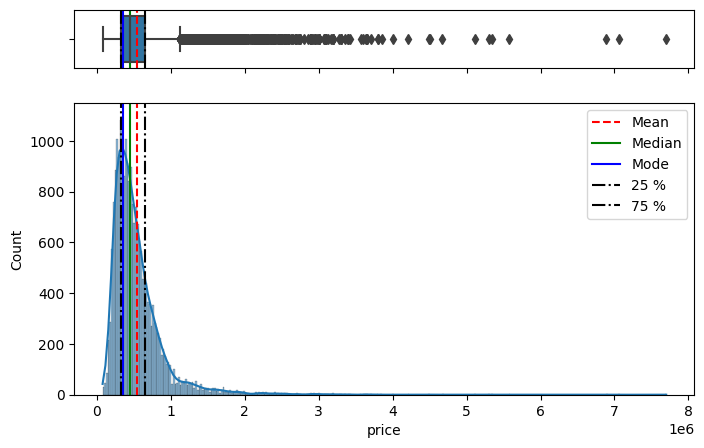

In [184]:
# Boxplot and Histogram for 'price' with mean, median, mode and percentile displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price'].mean()
median=df['price'].median()
mode=df['price'].mode().values[0]
cutoff1=df['price'].quantile(0.25)
cutoff2=df['price'].quantile(0.75)

sns.boxplot(data=df, x="price", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff1, color='black', linestyle='-.')
ax_box.axvline(cutoff2, color='black', linestyle='-.')

sns.histplot(data=df, x="price", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff1, color='black', linestyle='-.', label="25 %")
ax_hist.axvline(cutoff2, color='black', linestyle='-.', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In this plot we see the distribution of price. The histogram is positively skewed. That means that the average is not the mean and we should use the median for further analysis. In addition we see in the boxplot that we have a few outliers in our dataset. Clean data and remove the outliers.

<br>

In [185]:
df.describe()

price  bedrooms  bathrooms  sqft_living      view     grade  \
count 21597.000   21597.000 21597.000  21597.000    21534.000 21597.000   
mean  540296.574  3.373     2.116      2080.322     0.234     7.658       
std   367368.140  0.926     0.769      918.106      0.766     1.173       
min   78000.000   1.000     0.500      370.000      0.000     3.000       
25%   322000.000  3.000     1.750      1430.000     0.000     7.000       
50%   450000.000  3.000     2.250      1910.000     0.000     7.000       
75%   645000.000  4.000     2.500      2550.000     0.000     8.000       
max   7700000.000 33.000    8.000      13540.000    4.000     13.000      

        zipcode       lat      long  sqft_living15  price_per_sqft  
count 21597.000 21597.000 21597.000 21597.000      21597.000        
mean  98077.952 47.560    -122.214  1986.620       264.143          
std   53.513    0.139     0.141     685.230        110.000          
min   98001.000 47.156    -122.519  399.000        87.588           
25%   98033.000 47.471    -122.328  1490.000       182.292          
50%   98065.000 47.572    -122.231  1840.000       244.645          
75%   98118.000 47.678    -122.125  2360.000       318.333          
max   98199.000 47.778    -121.315  6210.000       810.139

Make a boxplot and histogram to show the distribution of price_per_sqft:

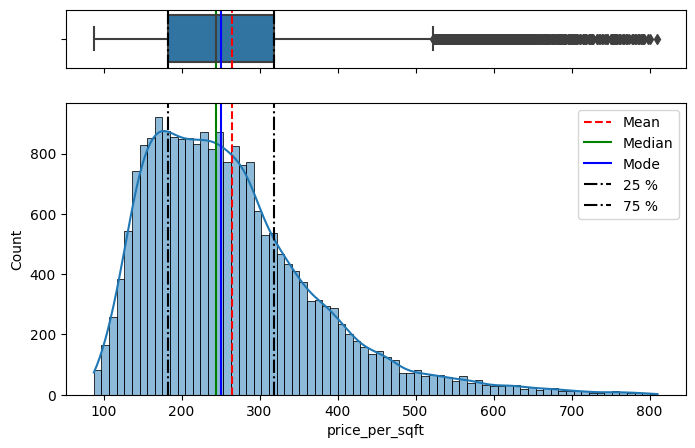

In [186]:
# Boxplot and Histogram for 'price_per_sqft' with mean, median, mode and percentile displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price_per_sqft'].mean()
median=df['price_per_sqft'].median()
mode=df['price_per_sqft'].mode().values[0]
cutoff1=df['price_per_sqft'].quantile(0.25)
cutoff2=df['price_per_sqft'].quantile(0.75)

sns.boxplot(data=df, x="price_per_sqft", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff1, color='black', linestyle='-.')
ax_box.axvline(cutoff2, color='black', linestyle='-.')

sns.histplot(data=df, x="price_per_sqft", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff1, color='black', linestyle='-.', label="25 %")
ax_hist.axvline(cutoff2, color='black', linestyle='-.', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In this plot we see the distribution of price_per_sqft. This graph is also positively skewed. That means that the average is not the mean and we should use the median for further analysis. In addition to that we can see that we have a high probability of outliers in our dataset. But in comparison to the graph above the skewness to the right is not as pronounced.

<br>

### Time to get rid of the outliers:

In [187]:
# Calculate outliers: q3 + iqr*1.5
q_25, q_75 = df['price'].quantile([0.25, 0.75])
iqr = q_75 - q_25

# Save outliers in variable:
cutoff = q_75 + (iqr * 1.5)
print(cutoff)

1129500.0


In [188]:
# Look up RangeIndex
df.info()  # RangeIndex: 21597 entries, 0 to 21596

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   view            21534 non-null  float64
 5   grade           21597 non-null  int64  
 6   zipcode         21597 non-null  int64  
 7   lat             21597 non-null  float64
 8   long            21597 non-null  float64
 9   sqft_living15   21597 non-null  int64  
 10  price_per_sqft  21597 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.8 MB


In [189]:
# save new dataframe without outliers:
df = df[df['price'] < cutoff].reset_index(drop=True)
df.head()

price  bedrooms  bathrooms  sqft_living  view  grade  zipcode    lat  \
0 221900.000  3        1.000       1180        0.000  7      98178   47.511   
1 538000.000  3        2.250       2570        0.000  7      98125   47.721   
2 180000.000  2        1.000       770         0.000  6      98028   47.738   
3 604000.000  4        3.000       1960        0.000  7      98136   47.521   
4 510000.000  3        2.000       1680        0.000  8      98074   47.617   

      long  sqft_living15  price_per_sqft  
0 -122.257  1340          188.051          
1 -122.319  1690          209.339          
2 -122.233  2720          233.766          
3 -122.393  1360          308.163          
4 -122.045  1800          303.571

In [190]:
# check RangeIndex
df.info()  # RangeIndex: 20439 entries, 0 to 20438

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20439 entries, 0 to 20438
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           20439 non-null  float64
 1   bedrooms        20439 non-null  int64  
 2   bathrooms       20439 non-null  float64
 3   sqft_living     20439 non-null  int64  
 4   view            20381 non-null  float64
 5   grade           20439 non-null  int64  
 6   zipcode         20439 non-null  int64  
 7   lat             20439 non-null  float64
 8   long            20439 non-null  float64
 9   sqft_living15   20439 non-null  int64  
 10  price_per_sqft  20439 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.7 MB


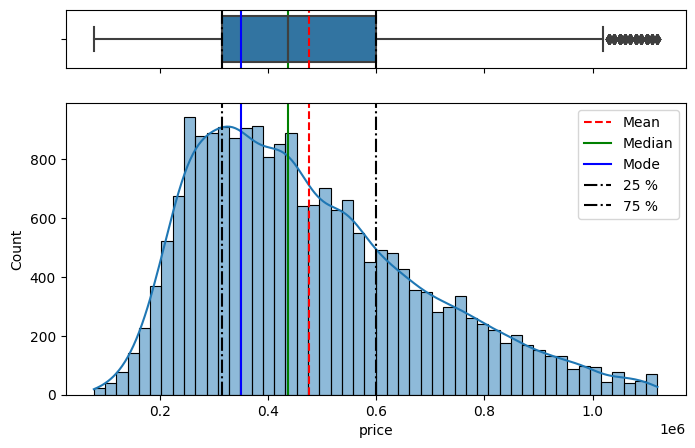

In [191]:
# Plot without outlieres in price:
# Boxplot and Histogram for 'price' with mean, median, mode and percentile displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price'].mean()
median=df['price'].median()
mode=df['price'].mode().values[0]
cutoff1=df['price'].quantile(0.25)
cutoff2=df['price'].quantile(0.75)

sns.boxplot(data=df, x="price", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff1, color='black', linestyle='-.')
ax_box.axvline(cutoff2, color='black', linestyle='-.')

sns.histplot(data=df, x="price", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff1, color='black', linestyle='-.', label="25 %")
ax_hist.axvline(cutoff2, color='black', linestyle='-.', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

The distribution of price is still positively skewed.

## Let's check the first hypothesis: 
### The more sqft_living a house has, the more expensive it is.

* What is the correlation between __price__ and __sqft_living__?             

* What is the correlation between __price_per_sqft__ and __sqft_living__?   
* What is the correlation between __price__ and __bedrooms__?              
* What is the correlation between __price_per_sqft__ and __bedrooms__?       
* What is the correlation between __price__ and __bathrooms__?              
* What is the correlation between __price_per_sqft__ and __bathrooms__?     

<br>

#### Correlations price or price_per_sqft, and sqft_living:

In [192]:
# correlation between price and sqft_living:
correlation = df['price'].corr(df['sqft_living'])
print(correlation.round(1))

0.6


In [193]:
fig = px.scatter(df, x='price', y='sqft_living', opacity= 0.5, title='Correlation between Price and sqft living (correlation: 0.6)')
fig.update_traces(marker=dict(color='#40BCD8'))
fig.show()

In this scatterplot we see, that there is a high correlation between the price and the sqft living. More sqft living equates to a higher price.
<br>
Because there are 3 outliers in sqft_living (7480, 7120 and 7350), I will remove.

In [194]:
# remove three outliers
df = df[df['sqft_living'] < 7000]

In [195]:
correlation = df['price_per_sqft'].corr(df['sqft_living'])
print(correlation.round(1))

-0.3


In [196]:
fig = px.scatter(df, x='price_per_sqft', y='sqft_living', 
                opacity= 0.5, 
                title='Correlation between Price/sqft and sqft living (correlation: -0.3)')
fig.update_traces(marker=dict(color='#40BCD8'))
fig.show()

In this scatterplot we see, that the correlation between sqft living and price per sqft is negative moderate. That was to be expected, as _price/sqft living_ scales like _1/sqft living_, but _price_ and _sqft living_ still have a positive correlation.

<br>

#### Correlations price or price_per_sqft, and bedrooms:

In [197]:
correlation = df['price'].corr(df['bedrooms'])
print(correlation.round(1))

0.3


In [198]:
fig = px.scatter(df, x='price', y='bedrooms', opacity= 0.5, title='Correlation between Price and bedrooms (correlation: 0.3)')
fig.update_traces(marker=dict(color='#40BCD8'))
fig.show()

In this scatterplot we can see, that there is only a moderate correlation. Bedrooms don't influence the price as much as I thought. We can see one outlier with 33 bedrooms. Remove outlier and all houses with more than 5 bedrooms, because only houses with less bedrooms are in the stakeholders interest.

<br>

In [199]:
# remove outliers and filter for houses with 5 and less bedrooms:
df = df[df['bedrooms'] < 6]

In [200]:
correlation = df['price_per_sqft'].corr(df['bedrooms'])
print(correlation.round(1))

-0.3


In [201]:
fig = px.scatter(df, x='price_per_sqft', y='bedrooms', 
                opacity= 0.5, title='Correlation between Price/sqft and bedrooms (correlation: -0.3)')
fig.update_traces(marker=dict(color='#40BCD8'))
fig.show()

Weak negative correlation between price per sqft and bedrooms was also expected here. Same explanation like in correlation scatterplot
sqft living and price per sqft.

<br>

#### Correlations price or price_per_sqft, and bathrooms:

In [202]:
correlation = df['price'].corr(df['bathrooms'])
print(correlation.round(1))

0.5


In [203]:
fig = px.scatter(df, x='price', y='bathrooms', color='price', opacity= 0.5, title='Correlation between Price and Number of Bathrooms  (correlation: 0.5)')
fig.update_traces(marker=dict(color='#40BCD8'))
fig.show()

In [204]:
correlation = df['price_per_sqft'].corr(df['bathrooms'])
print(correlation.round(1))

-0.2


In [205]:
fig = px.scatter(df, x='price_per_sqft', y='bathrooms', 
                opacity= 0.5, title='Correlation between Price/sqft and Number of Bathrooms  (correlation: -0.2)')
fig.update_traces(marker=dict(color='#40BCD8'))
fig.show()

This scatterplot also shows, that price_per_sqft is not a suitable value for correlations. Logically the same explanation as above. Correlation is negative weak.

<br>

## Conclusion to first hypothesis:
### The more sqft_living a house has, the more expensive it is. YES

* What is the correlation between __price__ and __sqft_living__?            -> Correlation is __strong__.  

* What is the correlation between __price_per_sqft__ and __sqft_living__?   -> Correlation is negative __moderate__.
* What is the correlation between __price__ and __bedrooms__?               -> Correlation is __moderate__.  
* What is the correlation between __price_per_sqft__ and __bedrooms__?      -> Correlation is negative __moderate__. 
* What is the correlation between __price__ and __bathrooms__?              -> Correlation is __strong__.
* What is the correlation between __price_per_sqft__ and __bathrooms__?     -> Correlation is negative __moderate__.

<br>

Keep __Stakeholder__ in mind: We now know, that the price is mainly influenced by the sqft_living and the number of bathrooms. 
Ergo: We should look for houses that have an average number of bathrooms (because we need to think of families!) but are below average price for sqft_living and then filter these houses by grade.

<br>

### Checking second Hypothesis: Homes that are further away of a city center or are in a rural area are cheaper. 
##### Distance from a house to the city center (by my definition a city center is where the town/city hall is). 
##### I need:
* Top ten cities in King County by Total Population by Place
* Latitude and longitude of the cities town halls
* Function to calculate the distance between each house and my top ten city centers
* Function that returns the smallest distance to a city center.
* Make two new columns: column city (shows with city is nearest to the house) and column distance_to_center (shows distance in km from house to the city center).

In [206]:
# Top ten cities in King County by Total Population by Place: 
# Source: https://statisticalatlas.com/county/Washington/King-County/Population
# Definition city center: lat and long of city town/city hall

# Dict of Top ten cities in King County by Total Population by Place
cities = {
    'Seattle':  (47.5994862,-122.3386744),
    'Bellevue': (47.614463,-122.2310811),
    'Kent': (47.3806225,-122.2561947,),
    'Renton': (47.4747632,-122.2142851),
    'Federal Way': (47.3012382,-122.322559),
    'Kirkland': (47.678471,-122.2452861),
    'Auburn': (47.3078503,-122.2484648),
    'Sammamish': (47.601572,-122.0390594),
    'Redmond': (47.6789194,-122.1358138),
    'Shoreline': (47.7562273,-122.3463749)

}


# Calculate distance from house to city center: ((house.lat - center.lat) + (house.long - center.long)**2)**0.5
# 1 degree = 111km
def distance(lat: float, long: float, center: tuple[float, float]) -> float:
    return round((((lat - center[0])**2 + (long - center[1])**2)**0.5)*111, 3)


# Returns smallest distance to center of nearest city in km:
def distance_to_center(lat: float, long: float) -> tuple:
    distances = {cityname: distance(lat, long, center) for cityname, center in cities.items()}
    smallest_distance = min(distances.items(), key=lambda x: x[1])
    return smallest_distance

In [207]:
# Create new column: 'city'
df['city'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[0], axis=1)
df.head()


price  bedrooms  bathrooms  sqft_living  view  grade  zipcode    lat  \
0 221900.000  3        1.000       1180        0.000  7      98178   47.511   
1 538000.000  3        2.250       2570        0.000  7      98125   47.721   
2 180000.000  2        1.000       770         0.000  6      98028   47.738   
3 604000.000  4        3.000       1960        0.000  7      98136   47.521   
4 510000.000  3        2.000       1680        0.000  8      98074   47.617   

      long  sqft_living15  price_per_sqft       city  
0 -122.257  1340          188.051          Renton     
1 -122.319  1690          209.339          Shoreline  
2 -122.233  2720          233.766          Kirkland   
3 -122.393  1360          308.163          Seattle    
4 -122.045  1800          303.571          Sammamish

In [208]:
# Create new column: 'distance_to_center'
df['distance_to_center'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[1], axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  view  grade  zipcode    lat  \
0 221900.000  3        1.000       1180        0.000  7      98178   47.511   
1 538000.000  3        2.250       2570        0.000  7      98125   47.721   
2 180000.000  2        1.000       770         0.000  6      98028   47.738   
3 604000.000  4        3.000       1960        0.000  7      98136   47.521   
4 510000.000  3        2.000       1680        0.000  8      98074   47.617   

      long  sqft_living15  price_per_sqft       city  distance_to_center  
0 -122.257  1340          188.051          Renton    6.232                
1 -122.319  1690          209.339          Shoreline 4.952                
2 -122.233  2720          233.766          Kirkland  6.736                
3 -122.393  1360          308.163          Seattle   10.614               
4 -122.045  1800          303.571          Sammamish 1.814

In [209]:
# Create new column: distance_rating for future plotting

# [0, 10, 20, 30, 40] --> ['center', 'near center', 'suburbs', 'rural']

distance_rating_bins = pd.cut(df['distance_to_center'], [0, 10, 20, 30, 40], labels=['center', 'near center', 'suburbs', 'rural']) #, labels=['center', 'near center', 'suburbs', 'outer area', 'rural'])
distance_rating_bins.name = 'distance_rating'

df = df.join(distance_rating_bins, how='inner')
df.head(10)
# print(distance_rating_bins)

price  bedrooms  bathrooms  sqft_living  view  grade  zipcode    lat  \
0 221900.000  3        1.000       1180        0.000  7      98178   47.511   
1 538000.000  3        2.250       2570        0.000  7      98125   47.721   
2 180000.000  2        1.000       770         0.000  6      98028   47.738   
3 604000.000  4        3.000       1960        0.000  7      98136   47.521   
4 510000.000  3        2.000       1680        0.000  8      98074   47.617   
5 257500.000  3        2.250       1715        0.000  7      98003   47.310   
6 291850.000  3        1.500       1060        NaN    7      98198   47.410   
7 229500.000  3        1.000       1780        0.000  7      98146   47.512   
8 323000.000  3        2.500       1890        0.000  7      98038   47.368   
9 662500.000  3        2.500       3560        0.000  8      98007   47.601   

      long  sqft_living15  price_per_sqft         city  distance_to_center  \
0 -122.257  1340          188.051          Renton      6.232                 
1 -122.319  1690          209.339          Shoreline   4.952                 
2 -122.233  2720          233.766          Kirkland    6.736                 
3 -122.393  1360          308.163          Seattle     10.614                
4 -122.045  1800          303.571          Sammamish   1.814                 
5 -122.327  2238          150.146          Federal Way 1.061                 
6 -122.315  1650          275.330          Kent        7.272                 
7 -122.337  1780          128.933          Seattle     9.679                 
8 -122.031  2390          170.899          Renton      23.522                
9 -122.145  2210          186.096          Redmond     8.742                 

  distance_rating  
0  center          
1  center          
2  center          
3  near center     
4  center          
5  center          
6  center          
7  center          
8  suburbs         
9  center

#### Correlations between price, price_per_sqft and distance_to_center

In [210]:
correlation = df['price'].corr(df['distance_to_center'])
print(correlation.round(1))

-0.1


In [211]:
correlation = df['price_per_sqft'].corr(df['distance_to_center'])
print(correlation.round(1))

-0.2


#### Correlations for each city distance_to_center and price and price_per_sqft

In [212]:
for city in cities:
    c = df[df['city'] == city][['distance_to_center', 'price']].corr()
    print(city, c.round(1))

Seattle                     distance_to_center  price
distance_to_center 1.000               -0.300
price              -0.300              1.000 
Bellevue                     distance_to_center  price
distance_to_center 1.000               -0.400
price              -0.400              1.000 
Kent                     distance_to_center  price
distance_to_center 1.000               0.300 
price              0.300               1.000 
Renton                     distance_to_center  price
distance_to_center 1.000               -0.000
price              -0.000              1.000 
Federal Way                     distance_to_center  price
distance_to_center 1.000               0.400 
price              0.400               1.000 
Kirkland                     distance_to_center  price
distance_to_center 1.000               -0.400
price              -0.400              1.000 
Auburn                     distance_to_center  price
distance_to_center 1.000               0.200 
price              0.20

In [213]:
for city in cities:
    c = df[df['city'] == city][['distance_to_center', 'price_per_sqft']].corr()
    print(city, c.round(1))

Seattle                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.300         
price_per_sqft     -0.300              1.000          
Bellevue                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.500         
price_per_sqft     -0.500              1.000          
Kent                     distance_to_center  price_per_sqft
distance_to_center 1.000               0.200          
price_per_sqft     0.200               1.000          
Renton                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.100         
price_per_sqft     -0.100              1.000          
Federal Way                     distance_to_center  price_per_sqft
distance_to_center 1.000               0.500          
price_per_sqft     0.500               1.000          
Kirkland                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.400         
price_per_sqft 

##### Take the cities where correlation is negative strong and negative moderate and make scatterplot: 
* Seattle (-0.3), Bellevue (-0.5), Kirkland (-0.4) and Sammamish (-0.3)
<br>
(Why negative strong? -> Negative strong means here, that the farther away from city center the less expensive the house is.)


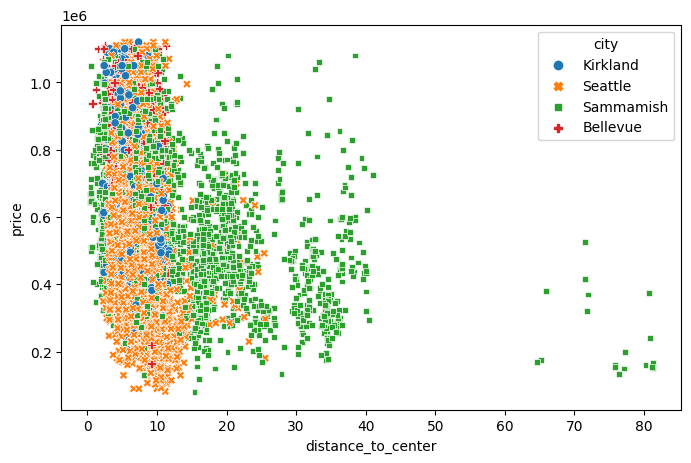

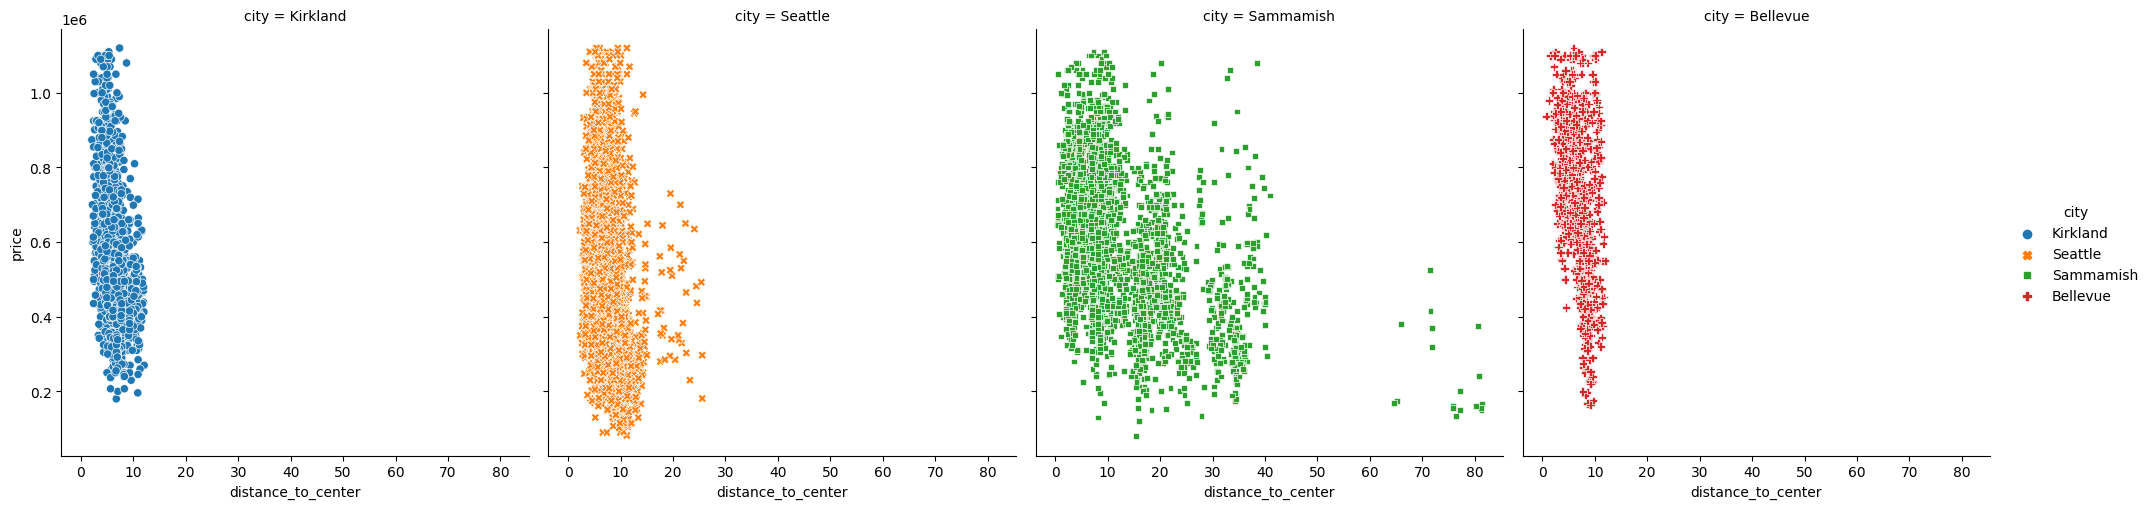

In [221]:
# Make DataFrame with the four cities to plot:
df_filter_cities = df.query('city in ("Seattle", "Bellevue", "Kirkland", "Sammamish")')

# Make scatterplot:
# Assigning a variable to hue will map its levels to the color of the points:
# Assigning the same variable to style will also vary the markers and create a more accessible plot:
sns.scatterplot(data=df_filter_cities, x='distance_to_center', y='price', hue='city', style='city')

# Use relplot() to combine scatterplot() and FacetGrid. This allows grouping within additional categorical variables, and plotting them across multiple subplots.
sns.relplot(
    data=df_filter_cities, x='distance_to_center', y='price',
    col='city', hue='city', style='city',
    kind='scatter'
);

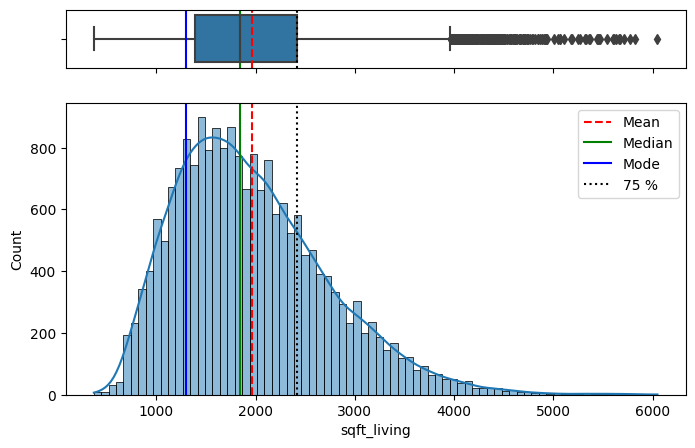

In [216]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['sqft_living'].mean()
median=df['sqft_living'].median()
mode=df['sqft_living'].mode().values[0]
cutoff=df['sqft_living'].quantile(0.75)

sns.boxplot(data=df, x="sqft_living", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="sqft_living", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

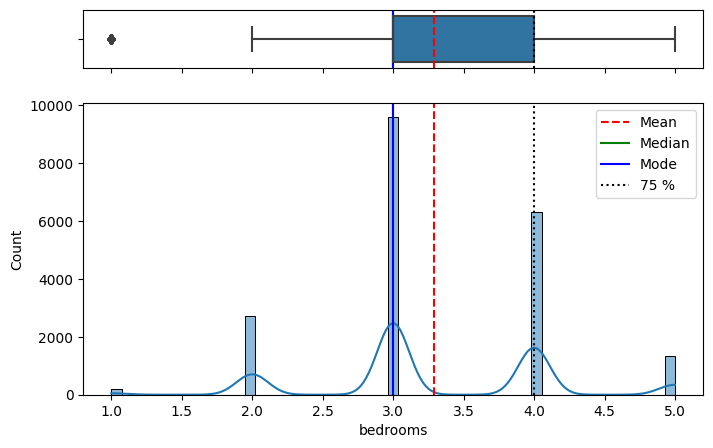

In [217]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['bedrooms'].mean()
median=df['bedrooms'].median()
mode=df['bedrooms'].mode().values[0]
cutoff=df['bedrooms'].quantile(0.75)

sns.boxplot(data=df, x="bedrooms", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="bedrooms", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [218]:
df.head()

price  bedrooms  bathrooms  sqft_living  view  grade  zipcode    lat  \
0 221900.000  3        1.000       1180        0.000  7      98178   47.511   
1 538000.000  3        2.250       2570        0.000  7      98125   47.721   
2 180000.000  2        1.000       770         0.000  6      98028   47.738   
3 604000.000  4        3.000       1960        0.000  7      98136   47.521   
4 510000.000  3        2.000       1680        0.000  8      98074   47.617   

      long  sqft_living15  price_per_sqft       city  distance_to_center  \
0 -122.257  1340          188.051          Renton    6.232                 
1 -122.319  1690          209.339          Shoreline 4.952                 
2 -122.233  2720          233.766          Kirkland  6.736                 
3 -122.393  1360          308.163          Seattle   10.614                
4 -122.045  1800          303.571          Sammamish 1.814                 

  distance_rating  
0  center          
1  center          
2  center          
3  near center     
4  center

In [219]:
df.describe()

price  bedrooms  bathrooms  sqft_living      view     grade  \
count 20165.000   20165.000 20165.000  20165.000    20108.000 20165.000   
mean  475086.433  3.290     2.040      1961.162     0.170     7.529       
std   207183.371  0.817     0.697      762.874      0.635     1.037       
min   78000.000   1.000     0.500      370.000      0.000     3.000       
25%   315000.000  3.000     1.500      1390.000     0.000     7.000       
50%   435000.000  3.000     2.000      1840.000     0.000     7.000       
75%   600000.000  4.000     2.500      2420.000     0.000     8.000       
max   1120000.000 5.000     5.500      6050.000     4.000     12.000      

        zipcode       lat      long  sqft_living15  price_per_sqft  \
count 20165.000 20165.000 20165.000 20165.000      20165.000         
mean  98078.533 47.557    -122.213  1920.049       254.997           
std   53.331    0.141     0.143     614.415        100.334           
min   98001.000 47.156    -122.519  399.000        87.588            
25%   98033.000 47.459    -122.330  1470.000       179.720           
50%   98065.000 47.567    -122.231  1800.000       238.938           
75%   98118.000 47.680    -122.122  2279.000       306.338           
max   98199.000 47.778    -121.315  4950.000       810.139           

       distance_to_center  
count 20165.000            
mean  8.633                
std   6.358                
min   0.143                
25%   5.046                
50%   7.108                
75%   9.463                
max   81.317

In [220]:
# Make series with rows with 3 and less bedrooms:
bedrooms_series = df['bedrooms'] <= df['bedrooms'].mode()
bedrooms_series.name = 'few_bedrooms'

# Make series with rows where sqft_living is above the mode:
sqft_living_series = df['sqft_living'] >= df['sqft_living'].mode()
sqft_living_series.name = 'sqft_living_big'

# = pd.concat([df, price_per_sqft_series], axis=1)
#df.head()

ValueError: Can only compare identically-labeled Series objects

In [ ]:
#plt.scatter(df['distance_to_center'], df['price_per_sqft'], alpha=0.2)

#plt.xlabel('Distance to City Center (km)')
#plt.ylabel('Price per Sqft (US $)')
#plt.title('Distance to City Center vs. Price per Sqft')

#plt.show();

In [ ]:
#df.query('city == "Shoreline"').plot(kind='scatter', x='distance_to_center', y='price_per_sqft', alpha=0.2);


#### Summary

For our Stakeholder: 
* We should look for houses that have an average number of bathrooms (because we need to think of families!) but are below average price for sqft_living and then filter these houses by grade.